## 1.1) Apply ML Regression techniques on "50_Startups.csv" dataset.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={"figure.figsize":[10,10]})

In [10]:
df=pd.read_csv('50_Startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:xlabel='State', ylabel='count'>

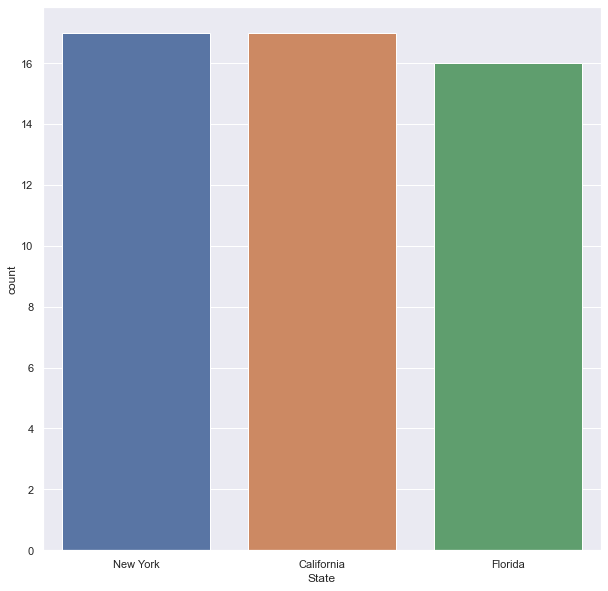

In [9]:
sns.countplot(x='State',data=df)

C:\Users\mega\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

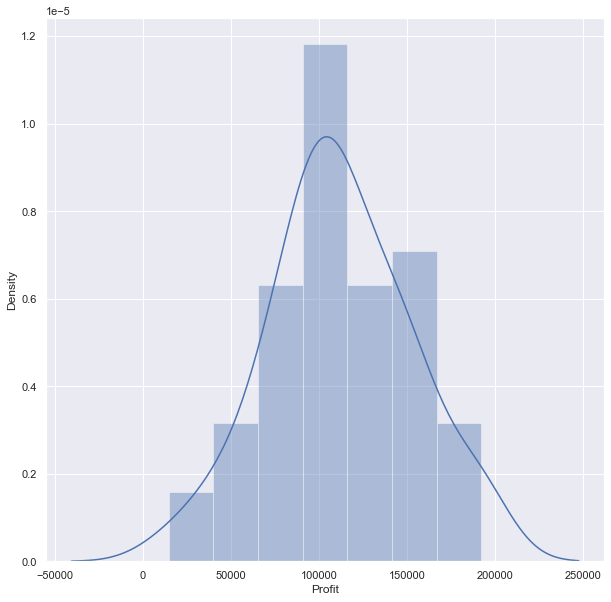

In [12]:
sns.distplot(df['Profit'])

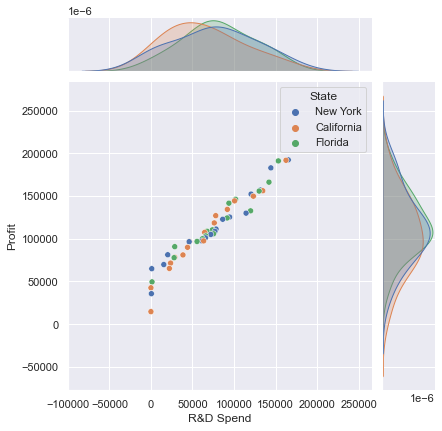

In [15]:
sns.jointplot(x=df['R&D Spend'],y=df['Profit'],hue=df['State'])

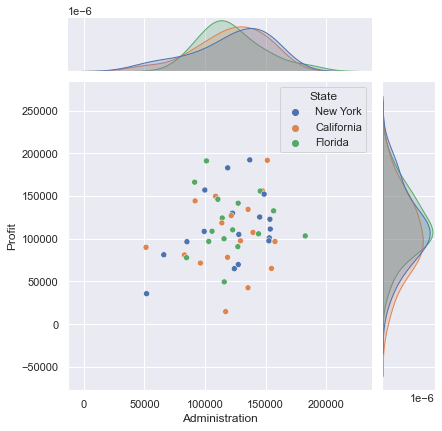

In [16]:
sns.jointplot(x=df['Administration'],y=df['Profit'],hue=df['State'])

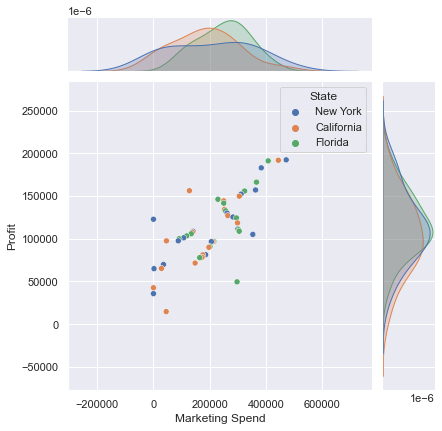

In [17]:
sns.jointplot(x=df['Marketing Spend'],y=df['Profit'],hue=df['State'])

<AxesSubplot:>

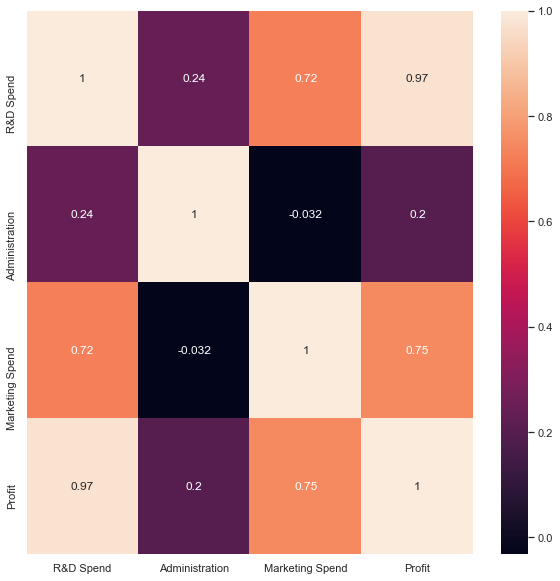

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df=df.drop("State",axis=1)

In [20]:
x=df.drop("Profit",axis=1)
y=df["Profit"]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=123)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [26]:
models = {
    "lr":LinearRegression(),
    "knn":KNeighborsRegressor(),
    "svr":SVR(),
    "dt":DecisionTreeRegressor(),
    "rf":RandomForestRegressor(),
    "xg":XGBRegressor()
} 

In [27]:
for name,model in models.items():
  print(f'using model:{name}')
  model.fit(x_train,y_train)
  print(f'training score:{model.score(x_train,y_train)}')
  print(f'testing score:{model.score(x_test,y_test)}')
  print("_"*30)

using model:lr
training score:0.9448967202583596
testing score:0.9679176532258635
______________________________
using model:knn
training score:0.8864220089767462
testing score:0.7702244319486197
______________________________
using model:svr
training score:-0.005310194673565638
testing score:-0.15656218066033345
______________________________
using model:dt
training score:1.0
testing score:0.8662626234246873
______________________________
using model:rf
training score:0.9873567015693951
testing score:0.9463641584165866
______________________________
using model:xg
training score:0.9999999999995771
testing score:0.9301668158566447
______________________________


## 1.2) Apply ML Regression techniques on "Houese prices.csv" dataset.

In [41]:
df=pd.read_csv('Houses prices.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [31]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [39]:
#df['country'].unique()
df['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [42]:
df.drop(['country','statezip','street','date'],axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [35]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
dtype: int64

In [34]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Vashon                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Fall City                11
Clyde Hill               11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific             

<AxesSubplot:>

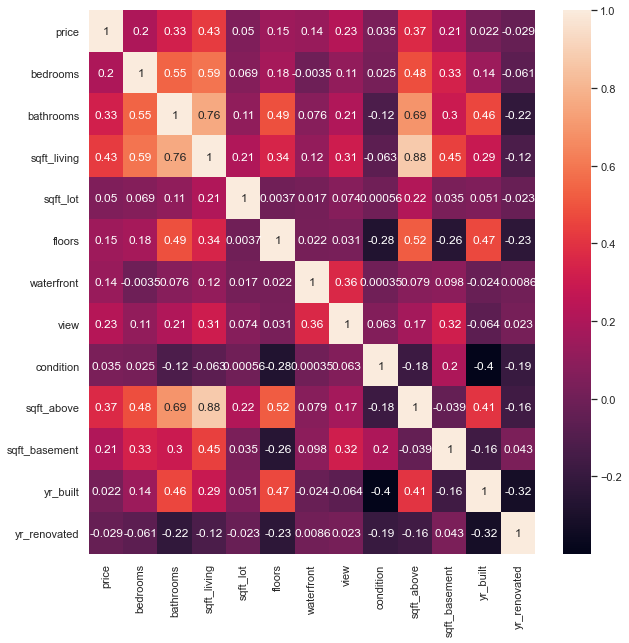

In [43]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='count', ylabel='city'>

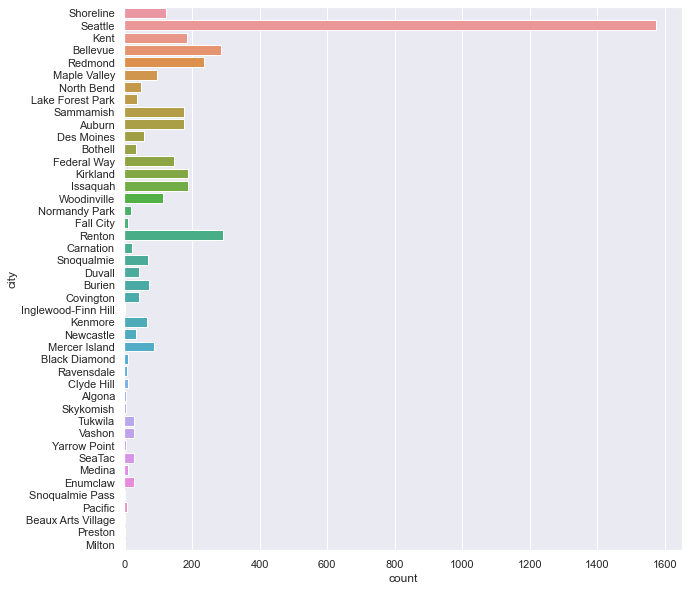

In [47]:
sns.countplot(y='city',data=df)

C:\Users\mega\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

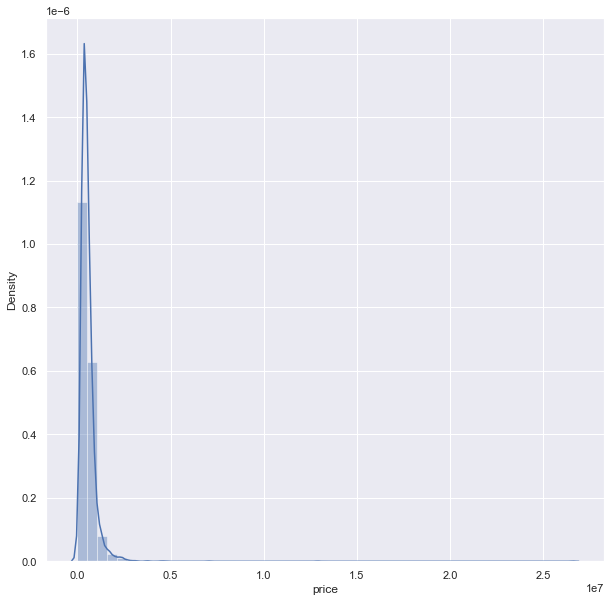

In [48]:
sns.distplot(df['price'])

In [49]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [50]:
from datasist.structdata import detect_outliers
indx=detect_outliers(df,0,['price'])
indx

[1,
 11,
 14,
 99,
 122,
 133,
 193,
 201,
 217,
 227,
 252,
 284,
 285,
 309,
 356,
 359,
 366,
 373,
 404,
 414,
 418,
 452,
 462,
 471,
 478,
 482,
 488,
 524,
 525,
 534,
 537,
 564,
 581,
 603,
 606,
 611,
 650,
 704,
 734,
 745,
 839,
 847,
 862,
 880,
 927,
 965,
 970,
 979,
 995,
 1010,
 1056,
 1077,
 1107,
 1127,
 1128,
 1132,
 1143,
 1176,
 1186,
 1209,
 1258,
 1268,
 1275,
 1301,
 1302,
 1337,
 1345,
 1355,
 1369,
 1386,
 1411,
 1436,
 1464,
 1468,
 1470,
 1500,
 1518,
 1543,
 1567,
 1571,
 1584,
 1600,
 1602,
 1617,
 1629,
 1636,
 1637,
 1660,
 1662,
 1675,
 1690,
 1813,
 1837,
 1848,
 1858,
 1911,
 1951,
 1974,
 2005,
 2030,
 2040,
 2061,
 2083,
 2093,
 2094,
 2108,
 2109,
 2139,
 2186,
 2206,
 2226,
 2250,
 2286,
 2328,
 2333,
 2357,
 2361,
 2364,
 2389,
 2401,
 2412,
 2434,
 2454,
 2495,
 2500,
 2533,
 2584,
 2607,
 2654,
 2670,
 2672,
 2699,
 2705,
 2711,
 2712,
 2713,
 2724,
 2725,
 2728,
 2731,
 2761,
 2767,
 2772,
 2786,
 2815,
 2825,
 2837,
 2841,
 2846,
 2858,
 288

In [51]:
df.drop(indx,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


C:\Users\mega\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

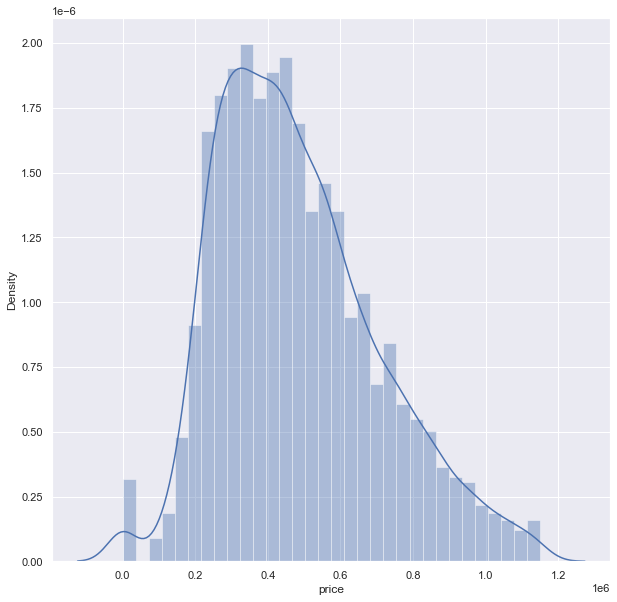

In [52]:
sns.distplot(df['price'])

In [53]:
df.drop('city',axis=1,inplace=True)

In [54]:
for name,model in models.items():
  print(f'using model:{name}')
  model.fit(x_train,y_train)
  print(f'training score:{model.score(x_train,y_train)}')
  print(f'testing score:{model.score(x_test,y_test)}')
  print("_"*30)

using model:lr
training score:0.9448967202583596
testing score:0.9679176532258635
______________________________
using model:knn
training score:0.8864220089767462
testing score:0.7702244319486197
______________________________
using model:svr
training score:-0.005310194673565638
testing score:-0.15656218066033345
______________________________
using model:dt
training score:1.0
testing score:0.8921936910209104
______________________________
using model:rf
training score:0.9886606616250176
testing score:0.9475773011238607
______________________________
using model:xg
training score:0.9999999999995771
testing score:0.9301668158566447
______________________________
